# Modeling TTC Data

## Preprocessing

After collecting TTC data from 2014-2020, we had to do some preprocessing to have it all usable.

In [394]:
import pandas as pd
import matplotlib

#reading each xlsx and changing columns to match to then concat
df2014 = pd.read_excel('data/ttc-streetcar-delay-data-2014.xlsx')
df2015 = pd.read_excel('data/ttc-streetcar-delay-data-2015.xlsx')
df2016 = pd.read_excel('data/ttc-streetcar-delay-data-2016.xlsx')
df2017 = pd.read_excel('data/ttc-streetcar-delay-data-2017.xlsx')
df2018 = pd.read_excel('data/ttc-streetcar-delay-data-2018.xlsx')
df2019 = pd.read_excel('data/ttc-streetcar-delay-data-2019.xlsx')
df2020 = pd.read_excel('data/ttc-streetcar-delay-data-2020_final.xlsx').rename(columns={'Delay':'Min Delay',
                                                                                  'Gap':'Min Gap'})
df2021 = pd.read_excel('data/ttc-streetcar-delay-data-jan-2021-to-august-2021.xlsx').rename(columns={'Bound':'Direction',
                                                                                               'Date':'Report Date',
                                                                                               'Line':'Route'})

df2014['Time'] = pd.to_datetime(df2014['Time'], format='%H:%M:%S').dt.time
df2015['Time'] = pd.to_datetime(df2015['Time'], format='%H:%M:%S').dt.time
df2016['Time'] = pd.to_datetime(df2016['Time'], format='%H:%M:%S').dt.time
df2017['Time'] = pd.to_datetime(df2017['Time'], format='%H:%M:%S').dt.time
df2018['Time'] = pd.to_datetime(df2018['Time'], format='%H:%M:%S').dt.time
df2019['Time'] = pd.to_datetime(df2019['Time'], format='%H:%M:%S').dt.time
df2020['Time'] = pd.to_datetime(df2020['Time'], format='%H:%M:%S').dt.time
df2021['Time'] = pd.to_datetime(df2021['Time'], format='%H:%M:%S').dt.time

frames = [df2014, df2015, df2016, df2017, df2018, df2019, df2020, df2021]
df_all = pd.concat(frames)

In [395]:
df_all = df_all.rename(columns={'Report Date':'Report_Date','Min Delay':'Min_Delay','Min Gap':'Min_Gap',
                       'Round Time':'Round_Time'})
df_all.to_csv('ttc-data.csv', index=False)
df_all

,Report_Date,Route,Time,Day,Location,Incident,Min_Delay,Min_Gap,Direction,Vehicle,Round_Time
0,2014-01-02,505,06:31:00,Thursday,Dundas and Roncesvalles,Late Leaving Garage,4.0,8.0,E/B,4018.0,06:30:00
1,2014-01-02,504,12:43:00,Thursday,King and Shaw,Utilized Off Route,20.0,22.0,E/B,4128.0,12:30:00
2,2014-01-02,501,14:01:00,Thursday,Kingston road and Bingham,Held By,13.0,19.0,W/B,4016.0,14:00:00
3,2014-01-02,504,14:22:00,Thursday,King St. and Roncesvalles Ave.,Investigation,7.0,11.0,W/B,4175.0,14:30:00
4,2014-01-02,504,16:42:00,Thursday,King and Bathurst,Utilized Off Route,3.0,6.0,E/B,4080.0,16:30:00
...,...,...,...,...,...,...,...,...,...,...,...
1013,2021-01-31,501,22:43:00,Sunday,QUEEN AND BROADVIEW,Emergency Services,11.0,21.0,W,4579.0,22:30:00
1014,2021-01-31,504,00:15:00,Sunday,KING AND SPADINA,Mechanical,3.0,8.0,W,4461.0,00:30:00
1015,2021-01-31,510,00:41:00,Sunday,SPADINA STATION,Emergency Services,20.0,30.0,NaN,4603.0,00:30:00
1016,2021-01-31,501,00:46:00,Sunday,QUEEN AND CHURCH,Held By,13.0,23.0,W,4432.0,01:00:00


## Early Data Exploration

### Looking at which locations have the most delays

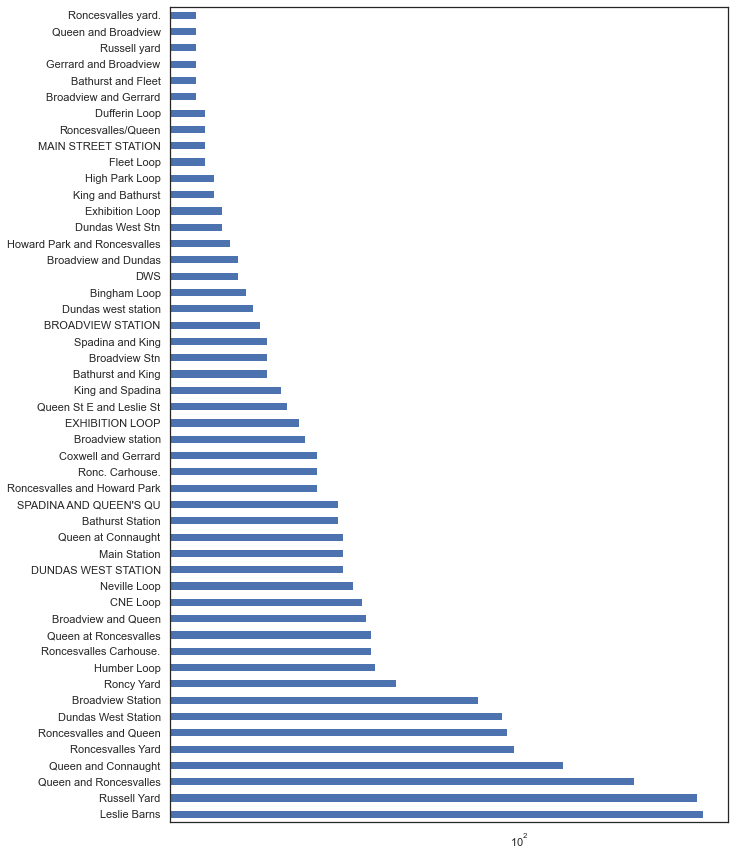

In [396]:
ax = df_all.Location.value_counts().nlargest(50).plot(kind='barh', figsize=(10,15))
ax.set_xscale('log')

### Sums of minutes delayed for each incident

In [397]:
df_all.groupby('Incident')['Min_Delay'].sum().sort_values(ascending=False)

Incident
Mechanical                  33239.0
Held By                     19725.0
Investigation               16716.0
Late Leaving Garage          8298.0
Emergency Services           6086.0
General Delay                4695.0
Diversion                    3196.0
Operations                   2353.0
Utilized Off Route           2100.0
Cleaning                     1448.0
Security                      784.0
Overhead                      440.0
Overhead - Pantograph         195.0
Collision - TTC Involved      173.0
Late                          119.0
Rail/Switches                  50.0
Name: Min_Delay, dtype: float64

### Sums of minutes delayed for each location

In [398]:
df_all.groupby('Location')['Min_Delay'].sum().sort_values(ascending=False).nlargest(50)

Location
Leslie Barns                             3579.0
Russell Yard                             1255.0
Queen and Roncesvalles                    928.0
Queen and Connaught                       776.0
Dundas West Station                       747.0
Queen and Broadview                       678.0
Roncesvalles Yard                         602.0
King and Dufferin                         558.0
Roncesvalles and Queen                    544.0
Roncy Yard                                542.0
Broadview Station                         534.0
king and spadina eb, kingand yirk wb      529.0
Union Station                             513.0
Spadina @ Dundas                          506.0
Neville Loop                              496.0
Humber Loop                               495.0
St. Clair and Dufferin                    492.0
Bathurst and Fleet                        488.0
Queens Quay and Spadina                   462.0
Oakwood to Gunns Loop both directions     458.0
Dundas and Victoria            

### Sums of minutes delayed by day

In [399]:
df_all.groupby('Day')['Min_Delay'].sum().sort_values(ascending=False)

Day
Tuesday      16406.0
Friday       15378.0
Wednesday    15295.0
Thursday     15217.0
Monday       12875.0
Saturday     12517.0
Sunday       11929.0
Name: Min_Delay, dtype: float64

### Data Summary

In [400]:
time_delay = df_all.groupby('Time')['Min_Delay'].sum()
std = time_delay.std()
mean = time_delay.mean()
print('The mean is %s and standard deviation is %g' %(mean, std))

The mean is 72.3435003631082 and standard deviation is 76.1645


### Top 5 incidents per day and their delays in minutes

In [401]:
df_agg = df_all.groupby(['Day','Incident']).agg({'Min_Delay':sum})
g = df_agg['Min_Delay'].groupby('Day', group_keys=False)
res = g.apply(lambda x: x.sort_values(ascending=False).head(5))
pd.DataFrame(res)

Min_Delay
Day       Incident                      
Friday    Mechanical              5188.0
          Investigation           2565.0
          Held By                 2173.0
          Late Leaving Garage     1667.0
          Emergency Services      1145.0
Monday    Mechanical              5073.0
          Held By                 2696.0
          Investigation           2000.0
          Late Leaving Garage      851.0
          General Delay            703.0
Saturday  Mechanical              3942.0
          Held By                 2190.0
          Investigation           2149.0
          Diversion                823.0
          General Delay            743.0
Sunday    Mechanical              3083.0
          Investigation           2318.0
          Held By                 2305.0
          Diversion               1235.0
          Late Leaving Garage     1018.0
Thursday  Mechanical              4878.0
          Held By                 3216.0
          Investigation           2897.0
          Late Leaving Garage     2095.0
          General Delay            534.0
Tuesday   Mechanical              5790.0
          Held By                 3409.0
          Investigation           2868.0
          Emergency Services      1340.0
          Late Leaving Garage     1151.0
Wednesday Mechanical              5285.0
          Held By                 3736.0
          Investigation           1919.0
          Emergency Services      1055.0
          General Delay            880.0

## Data Cleaning

### Dropping rows that are NaN

In [402]:
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt

df = pd.read_csv('ttc-data.csv')
df = df[df['Min_Delay'].notna()]
df = df[df['Route'].notna()]
df = df[df['Location'].notna()]
df = df[df['Min_Gap'].notna()]
df = df[df['Direction'].notna()]

df.info()

#For testing
#df['Vehicle'].isna().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8957 entries, 0 to 9079
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Report_Date  8957 non-null   object 
 1   Route        8957 non-null   object 
 2   Time         8957 non-null   object 
 3   Day          8957 non-null   object 
 4   Location     8957 non-null   object 
 5   Incident     8957 non-null   object 
 6   Min_Delay    8957 non-null   float64
 7   Min_Gap      8957 non-null   float64
 8   Direction    8957 non-null   object 
 9   Vehicle      8462 non-null   float64
 10  Round_Time   8957 non-null   object 
dtypes: float64(3), object(8)
memory usage: 839.7+ KB


## Feature Extraction

### Time in hours after midnight

In [403]:
from datetime import timedelta

time_in_minutes = []
time_in_hours = []

for time in df['Time']:
    time = time.split(":")
    delta = timedelta(hours=int(time[0]), minutes=int(time[1]), seconds=int(time[2]))
    total_seconds = delta.total_seconds()
    time_in_minutes.append(total_seconds/60)
    time_in_hours.append(total_seconds/60/60)

df['Time_in_minutes'] = time_in_minutes
df['Time_in_hours'] = time_in_hours
    
df

,Report_Date,Route,Time,Day,Location,Incident,Min_Delay,Min_Gap,Direction,Vehicle,Round_Time,Time_in_minutes,Time_in_hours
0,2014-01-02,505,06:31:00,Thursday,Dundas and Roncesvalles,Late Leaving Garage,4.0,8.0,E/B,4018.0,06:30:00,391.0,6.516667
1,2014-01-02,504,12:43:00,Thursday,King and Shaw,Utilized Off Route,20.0,22.0,E/B,4128.0,12:30:00,763.0,12.716667
2,2014-01-02,501,14:01:00,Thursday,Kingston road and Bingham,Held By,13.0,19.0,W/B,4016.0,14:00:00,841.0,14.016667
3,2014-01-02,504,14:22:00,Thursday,King St. and Roncesvalles Ave.,Investigation,7.0,11.0,W/B,4175.0,14:30:00,862.0,14.366667
4,2014-01-02,504,16:42:00,Thursday,King and Bathurst,Utilized Off Route,3.0,6.0,E/B,4080.0,16:30:00,1002.0,16.700000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9074,2021-01-31,512,22:10:00,Sunday,GUNN'S LOOP,Mechanical,5.0,10.0,E,4495.0,22:00:00,1330.0,22.166667
9075,2021-01-31,501,22:43:00,Sunday,QUEEN AND BROADVIEW,Emergency Services,11.0,21.0,W,4579.0,22:30:00,1363.0,22.716667
9076,2021-01-31,504,00:15:00,Sunday,KING AND SPADINA,Mechanical,3.0,8.0,W,4461.0,00:30:00,15.0,0.250000
9078,2021-01-31,501,00:46:00,Sunday,QUEEN AND CHURCH,Held By,13.0,23.0,W,4432.0,01:00:00,46.0,0.766667


## Exploring the Data

### Delay in minutes for each hour of day

<AxesSubplot:xlabel='Time_in_hours', ylabel='Min_Delay'>

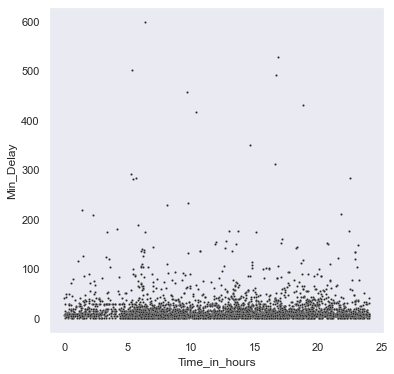

In [404]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="dark")

f, ax = plt.subplots(figsize=(6, 6))
sns.scatterplot(x=df['Time_in_hours'], y=df['Min_Delay'], s=5, color=".15")

### Hour of day Incidents occur

<AxesSubplot:xlabel='Incident', ylabel='Time_in_hours'>

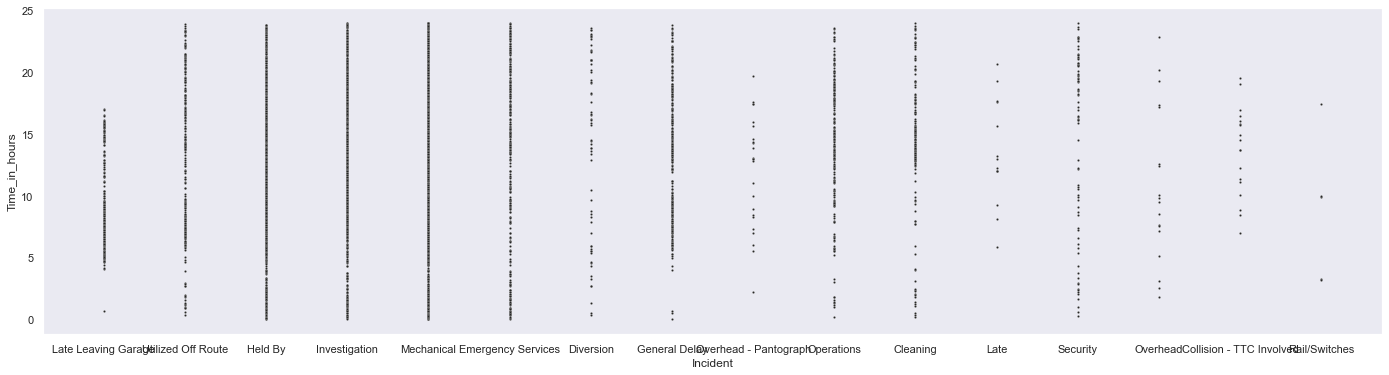

In [405]:
sns.set_theme(style="dark")

f, ax = plt.subplots(figsize=(24, 6))
sns.scatterplot(x=df['Incident'], y=df['Time_in_hours'], s=5, color=".15")

### Day, Hour, Incident, and Delay in minutes

<Figure size 1440x288 with 0 Axes>

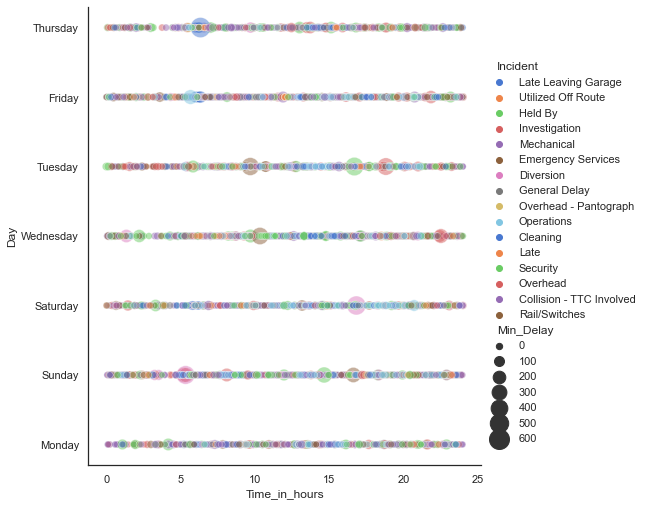

In [406]:
sns.set_theme(style="white")


plt.figure(figsize=(20,4))
# Plot miles per gallon against horsepower with other semantics
sns.relplot(x=df['Time_in_hours'], y=df['Day'], hue=df['Incident'], size=df['Min_Delay'],
            sizes=(40, 400), alpha=.5, palette="muted",
            height=7)


## CatBoost Regression Model

For the first model attempt, we shall take a look at regression through CatBoost. CatBoost comes with a regressor and allows us to quickly use 

### Preparation

In [407]:
# Splitting
# Dropping unused columns for training
training = df.drop('Report_Date', axis=1)
training = training.drop('Vehicle', axis=1)
training = training.drop('Round_Time', axis=1)
training = training.drop('Time', axis=1)

testing = training.sample(2700, random_state=1) # pick 5000 observations randomly
training = training.drop(testing.index) # Remove holdout from training data

# Splitting training/testing set to feature (X) and labels (y)
train_y = training.Min_Delay
train_X = training.drop('Min_Delay', axis=1)

test_X = testing.drop('Min_Delay', axis=1)

train_X
train_X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6257 entries, 0 to 9079
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Route            6257 non-null   object 
 1   Day              6257 non-null   object 
 2   Location         6257 non-null   object 
 3   Incident         6257 non-null   object 
 4   Min_Gap          6257 non-null   float64
 5   Direction        6257 non-null   object 
 6   Time_in_minutes  6257 non-null   float64
 7   Time_in_hours    6257 non-null   float64
dtypes: float64(3), object(5)
memory usage: 439.9+ KB


### Building the regressor

In [408]:
from catboost import Pool, CatBoostRegressor
from sklearn.metrics import mean_squared_error


cat_features = ['Route', 'Day', 'Location', 'Incident', 'Direction']


train_dataset = Pool(data=train_X,
                     label=train_y,
                     cat_features=cat_features)    

### Testing out depths

We will be using the Root Mean Square Error (RMES) to assess which depth is best for our CatBoost regression model to train on. We use RMES as we are trying to predict a continuous value of minutes delayed.

In [409]:
depths = []
results = []

#Building model and testing out various depths' Root Mean Square Error (RMES)
for d in range(4,11): 
    catboost_model = CatBoostRegressor(iterations=50,
                               learning_rate=1,
                               depth=d,
                               verbose=False)
    
    catboost_model.fit(train_dataset)
    
    pred = catboost_model.predict(train_X)
    mse = mean_squared_error(train_y, pred)
    depths.append(d)
    results.append(np.sqrt(mse))
    

#Printing the depth and corresponding RMES
print('\nDepth \tRMSE')
for i in range(len(results)):
    print(depths[i],"\t",results[i])


Depth 	RMSE
4 	 9.152317852636902
5 	 9.362897049023799
6 	 7.918019997778439
7 	 7.99128850282854
8 	 7.770824089353077
9 	 8.05668100783049
10 	 8.281829104448972


Looking at these results, we can see that for 50 iterations, a depth of 8 is ideal. We construct it below.

In [410]:
cat_features = ['Route', 'Day', 'Location', 'Incident', 'Direction']


train_dataset = Pool(data=train_X,
                     label=train_y,
                     cat_features=cat_features)

catboost_model = CatBoostRegressor(iterations=50,
                           learning_rate=1,
                           depth=6)

catboost_model.fit(train_dataset)

0:	learn: 13.8248199	total: 6.31ms	remaining: 309ms
1:	learn: 12.4315297	total: 10.9ms	remaining: 262ms
2:	learn: 11.7542500	total: 13.8ms	remaining: 216ms
3:	learn: 11.3271480	total: 16.2ms	remaining: 186ms
4:	learn: 10.4132669	total: 18.7ms	remaining: 169ms
5:	learn: 10.3107325	total: 21.7ms	remaining: 159ms
6:	learn: 10.2269782	total: 24.5ms	remaining: 151ms
7:	learn: 10.1567097	total: 27ms	remaining: 142ms
8:	learn: 9.8898160	total: 29.5ms	remaining: 134ms
9:	learn: 9.7301017	total: 31.8ms	remaining: 127ms
10:	learn: 9.6706468	total: 33.8ms	remaining: 120ms
11:	learn: 9.4285050	total: 36.1ms	remaining: 114ms
12:	learn: 9.3577969	total: 38.5ms	remaining: 110ms
13:	learn: 8.8478224	total: 41.3ms	remaining: 106ms
14:	learn: 7.9700709	total: 43.8ms	remaining: 102ms
15:	learn: 7.8875254	total: 46.4ms	remaining: 98.6ms
16:	learn: 7.6914510	total: 48.7ms	remaining: 94.6ms
17:	learn: 7.6902323	total: 50.6ms	remaining: 89.9ms
18:	learn: 7.6435528	total: 52.6ms	remaining: 85.9ms
19:	learn: 7

### Checking the CatBoost Regressor's Root Mean Squared Error

Let's see how the model does against the testing set.

### Predicting against Training set

In [411]:
pred = catboost_model.predict(train_X)
cb_train_pred = pred
mse = mean_squared_error(train_y, pred)
print(np.sqrt(mse))

7.918019997778439


### Predicting against Testing set

In [412]:
pred = catboost_model.predict(testing.drop('Min_Delay',axis=1))
cb_test_pred = pred
mse = mean_squared_error(testing['Min_Delay'], pred)
print(np.sqrt(mse))

6.997856494817059


Based on these results, our catboost model is off by ~7.5 on its predictions for minutes delay. This is not bad but not great. The difference betwee the training and testing is <1 so the fit is ok. 

Now, let's compare these results to a baseline to see if our model is any better at all.

## Baseline Model

The baseline simply finds the mean minutes delayed for each incident, and uses that to predict the minutes delayed.

In [413]:
#create a dict of unique incidents
incidents = df['Incident'].unique()
means = {}

#Find and store mean of Min_Delay minutes of each incident
for i in incidents:
    means[i] = df.loc[df['Incident'] == i]['Min_Delay'].mean()

Let's see how the baseline fares.

### Baseline against Training set

In [414]:
baseline_pred = []

#Baseline comparison to training set
for incident in training['Incident']:
    baseline_pred.append(means[incident])
    
bs_train_pred = baseline_pred

#Accuracy test for baseline predictions on training set
mse = mean_squared_error(training['Min_Delay'], baseline_pred)  
print(np.sqrt(mse))

21.484337959656116


### Baseline against Testing set

In [415]:
baseline_pred = []
bs_test_pred = []

#Baseline comparison to testing set
for incident in testing['Incident']:
    baseline_pred.append(means[incident])

bs_test_pred = baseline_pred

#Accuracy test for baseline predictions on testing set
mse = mean_squared_error(testing['Min_Delay'], baseline_pred)  
print(np.sqrt(mse))

20.352562627145154


We can see the baseline has a much higher RMSE than the CatBoost model. The CatBoost model does alright. Let's see if there's a way to get them lower by using another regression model.

## Simple Decision Tree Regression model

We will use SciKit's decision tree regressor library for this model.

Since we need to use numerical data, we convert our categorical features using encoding.

### Separating categorical features

In [416]:
cat_data = train_X.drop('Time_in_minutes', axis=1)
cat_data = cat_data.drop('Time_in_hours', axis=1)
cat_data = cat_data.drop('Min_Gap', axis=1)
cat_data['Route'].replace('Rad', 0)
cat_data

,Route,Day,Location,Incident,Direction
0,505,Thursday,Dundas and Roncesvalles,Late Leaving Garage,E/B
1,504,Thursday,King and Shaw,Utilized Off Route,E/B
2,501,Thursday,Kingston road and Bingham,Held By,W/B
3,504,Thursday,King St. and Roncesvalles Ave.,Investigation,W/B
4,504,Thursday,King and Bathurst,Utilized Off Route,E/B
...,...,...,...,...,...
9074,512,Sunday,GUNN'S LOOP,Mechanical,E
9075,501,Sunday,QUEEN AND BROADVIEW,Emergency Services,W
9076,504,Sunday,KING AND SPADINA,Mechanical,W
9078,501,Sunday,QUEEN AND CHURCH,Held By,W


### Converting data to numerical

In [417]:
#create encoded df
num_df = df

for cat in cat_data:
    dummies = pd.get_dummies(train_X[cat])
    num_df = pd.concat([num_df, dummies], axis=1)
    num_df = num_df.drop(cat, axis=1)

num_df = num_df.drop('Report_Date', axis=1)
num_df = num_df.drop('Vehicle', axis=1)
num_df = num_df.drop('Round_Time', axis=1)
num_df = num_df.drop('Time', axis=1)
num_df

,Min_Delay,Min_Gap,Time_in_minutes,Time_in_hours,16,17,2,22,24,3,...,W/B,WB,btw,bw,eb,ee,ew,r,s,wb
0,4.0,8.0,391.0,6.516667,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,20.0,22.0,763.0,12.716667,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,13.0,19.0,841.0,14.016667,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,7.0,11.0,862.0,14.366667,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3.0,6.0,1002.0,16.700000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9074,5.0,10.0,1330.0,22.166667,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9075,11.0,21.0,1363.0,22.716667,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9076,3.0,8.0,15.0,0.250000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9078,13.0,23.0,46.0,0.766667,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Building the regressor

In [418]:
from sklearn import tree

training = num_df

testing = training.sample(2700, random_state=1) # pick observations randomly
training = training.drop(testing.index) # Remove testing data from training data

# Splitting training/testing set to feature (X) and labels (y)
train_y = training.Min_Delay
train_X = training.drop('Min_Delay', axis=1)

testing = training.sample(2700, random_state=1)
test_y = testing.Min_Delay
test_X = testing.drop('Min_Delay', axis=1)


reg = tree.DecisionTreeRegressor()
reg = reg.fit(train_X, train_y)

### Checking the Simple Decision Tree Regressor's Root Mean Squared Error

Let's see how the simple decision tree regressor performs.

### Predicting against Training set

In [419]:
pred = reg.predict(train_X)
sd_train_pred = pred
mse = mean_squared_error(train_y, pred)
print(np.sqrt(mse))

1.372112016436003


### Predicting against Testing set

In [420]:
pred = reg.predict(test_X)
sd_test_pred = pred
mse = mean_squared_error(test_y, pred)
print(np.sqrt(mse))

1.4771092890682977


Looking at the RMSE of the simple decision tree regressor, we notice they are much lower than that of CatBoost. This means that it is a better overall model with closer estimates.

## Comparing the Regression Models

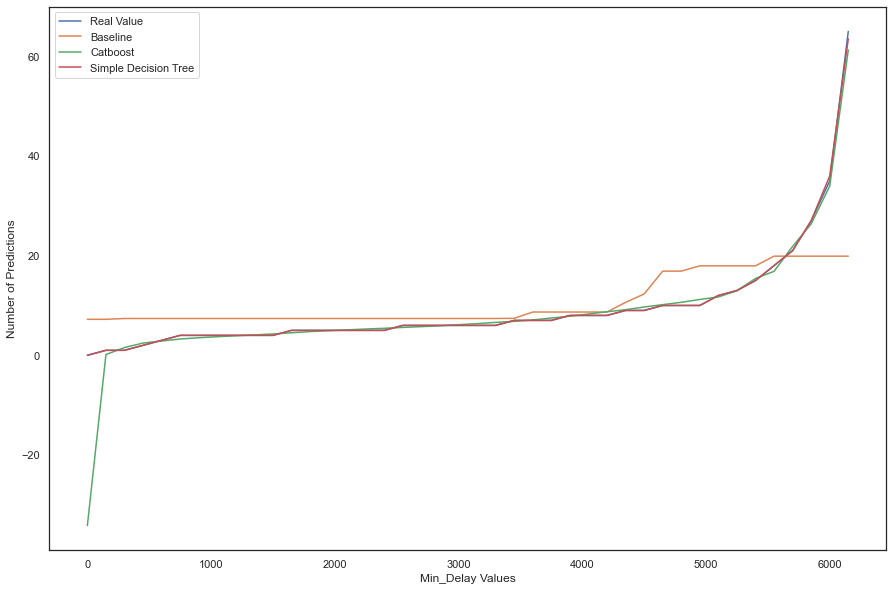

In [431]:
x = range(len(train_y))
y0 = train_y.sort_values()
y1 = bs_train_pred
y2 = cb_train_pred
y3 = sd_train_pred


plt. figure(figsize=(15,10))
plt.plot(x[::150], y0[::150], label = "Real Value", linestyle="-")
plt.plot(x[::150], y1[::150], label = "Baseline", linestyle="-")
plt.plot(x[::150], y2[::150], label = "Catboost", linestyle="-")
plt.plot(x[::150], y3[::150], label = "Simple Decision Tree", linestyle="-")
plt.legend()
plt.xlabel("Min_Delay Values")
plt.ylabel("Number of Predictions")
plt.show()

# K-Means Clustering Model

We used K-Means to cluster our data based on delay, time, incident and location to find patterns within our data.

### Data Cleaning for K-Means

In [422]:
#summing na values
df.isna().sum()

Report_Date          0
Route                0
Time                 0
Day                  0
Location             0
Incident             0
Min_Delay            0
Min_Gap              0
Direction            0
Vehicle            495
Round_Time           0
Time_in_minutes      0
Time_in_hours        0
dtype: int64

In [423]:
#removing na values and unused Min_Gap
df = df.dropna()

In [424]:
#removing values few values of zero (>250)
df = df.loc[~((df['Min_Delay'] == 0))]


### K-Means - Incident,  Location, Time, Delay

In [425]:
IL_data = df.drop(['Report_Date', 'Min_Delay', 'Direction', 'Day', 'Min_Gap',
                   'Round_Time', 'Time_in_hours', 'Route', 'Time', 'Time_in_minutes'], axis=1)
IL_data

,Location,Incident,Vehicle
0,Dundas and Roncesvalles,Late Leaving Garage,4018.0
1,King and Shaw,Utilized Off Route,4128.0
2,Kingston road and Bingham,Held By,4016.0
3,King St. and Roncesvalles Ave.,Investigation,4175.0
4,King and Bathurst,Utilized Off Route,4080.0
...,...,...,...
9074,GUNN'S LOOP,Mechanical,4495.0
9075,QUEEN AND BROADVIEW,Emergency Services,4579.0
9076,KING AND SPADINA,Mechanical,4461.0
9078,QUEEN AND CHURCH,Held By,4432.0


In [426]:
#encoded df
IL_dummy = df

for i in IL_data:
    dummies = pd.get_dummies(IL_data[i])
    IL_dummy = pd.concat([IL_dummy, dummies], axis=1)
    IL_dummy = IL_dummy.drop(i, axis=1)

IL_dummy = IL_dummy.drop(['Report_Date', 'Round_Time', 'Time', 'Route','Direction', 'Day', 'Time_in_minutes', 'Min_Gap'], axis=1)

IL_dummy['Min_Delay'] = (IL_dummy['Min_Delay'] - IL_dummy['Min_Delay'].min()) / (IL_dummy['Min_Delay'].max() - IL_dummy['Min_Delay'].min())
IL_dummy['Time_in_hours'] = (IL_dummy['Time_in_hours'] - IL_dummy['Time_in_hours'].min()) / (IL_dummy['Time_in_hours'].max() - IL_dummy['Time_in_hours'].min())

IL_dummy

,Min_Delay,Time_in_hours,1st and Lakeshore,28th Street and Lakeshore,37th / Lakeshore,37th Street and Lakeshore,40th / Lakeshore,5th / lakeshore,5th and Lakeshore,705 RAD,...,9227.0,9228.0,9229.0,9230.0,9231.0,9233.0,9234.0,9235.0,9237.0,9446.0
0,0.005008,0.271716,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.031720,0.530229,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.020033,0.584434,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.010017,0.599027,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.003339,0.696317,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9074,0.006678,0.924253,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9075,0.016694,0.947186,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9076,0.003339,0.010424,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9078,0.020033,0.031967,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


For k = 5 The average silhouette_score is : 0.15285127683135624
For k = 6 The average silhouette_score is : 0.15816262498292866
For k = 7 The average silhouette_score is : 0.07877083052993827
For k = 8 The average silhouette_score is : 0.1681194367340127
For k = 9 The average silhouette_score is : 0.08886050608720396
For k = 10 The average silhouette_score is : 0.07265632432957206
For k = 11 The average silhouette_score is : 0.08678772284412872
For k = 12 The average silhouette_score is : 0.058381811218790096
For k = 13 The average silhouette_score is : 0.09044746838127558
For k = 14 The average silhouette_score is : 0.07138542994222322
For k = 15 The average silhouette_score is : 0.042656249528544965
For k = 16 The average silhouette_score is : 0.059448102477695615
For k = 17 The average silhouette_score is : 0.06147285100172819
For k = 18 The average silhouette_score is : 0.042925586971727894
For k = 19 The average silhouette_score is : 0.0617186145339103


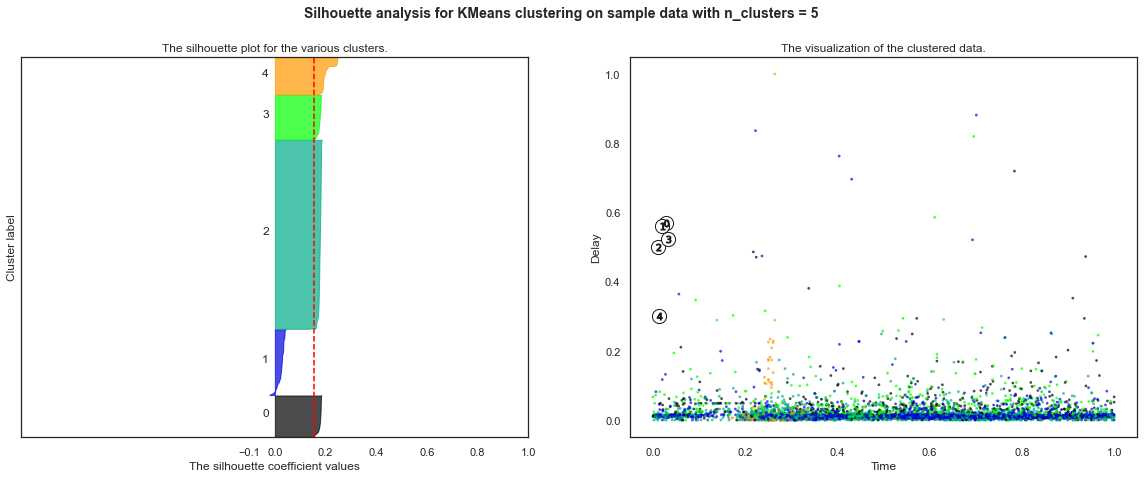

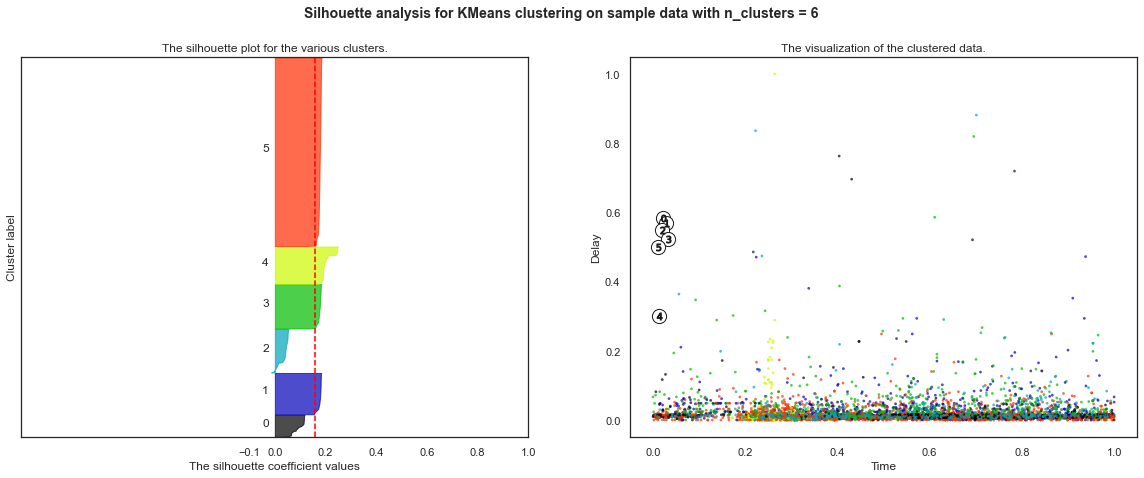

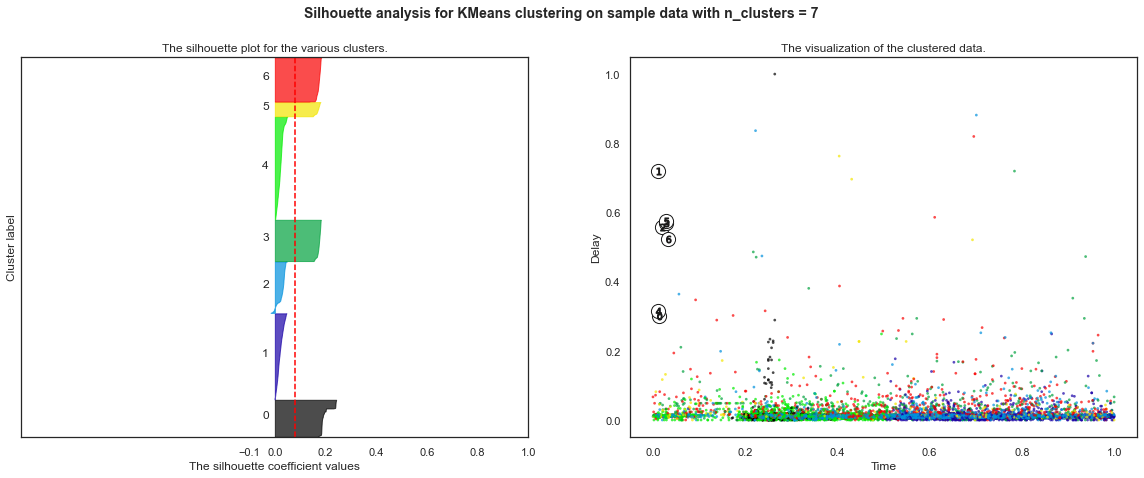

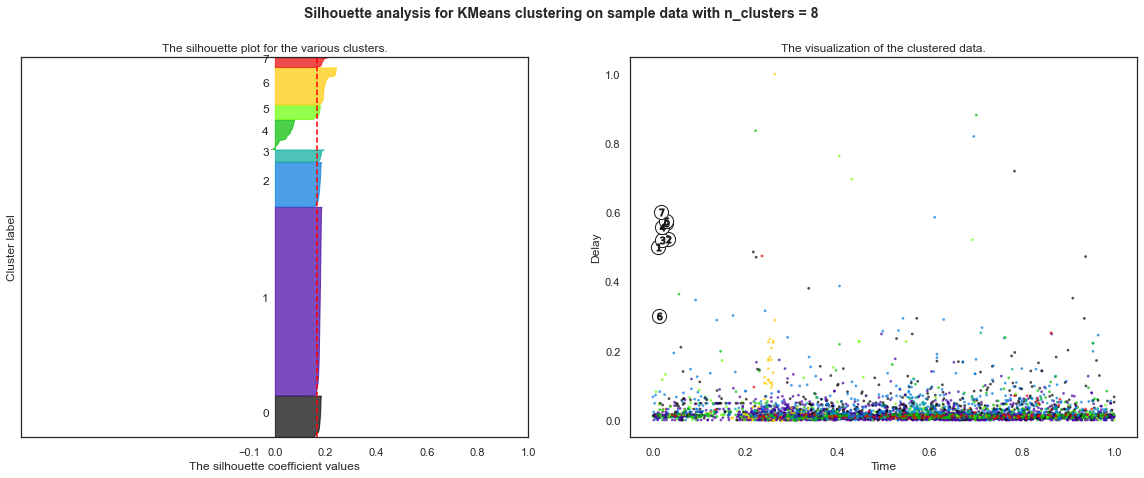

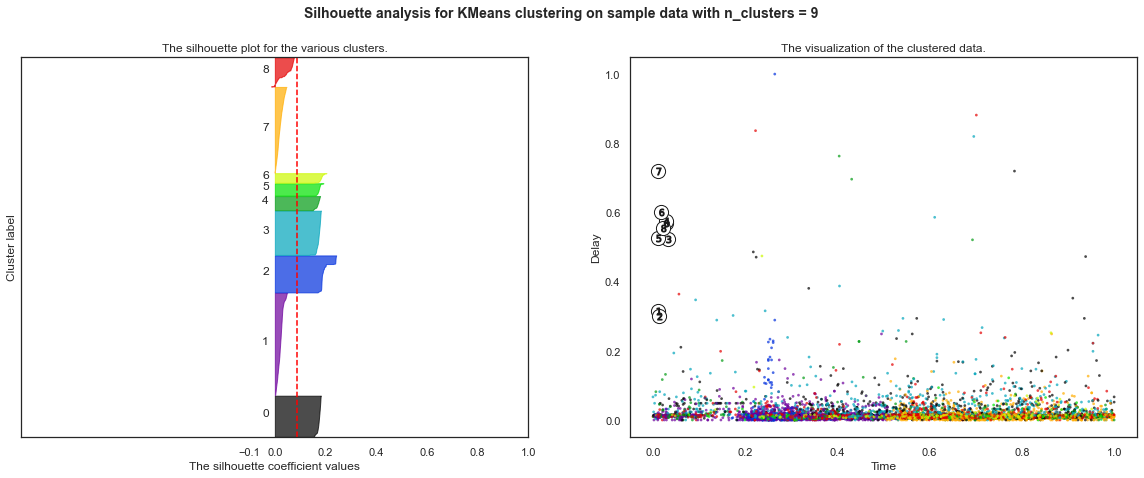

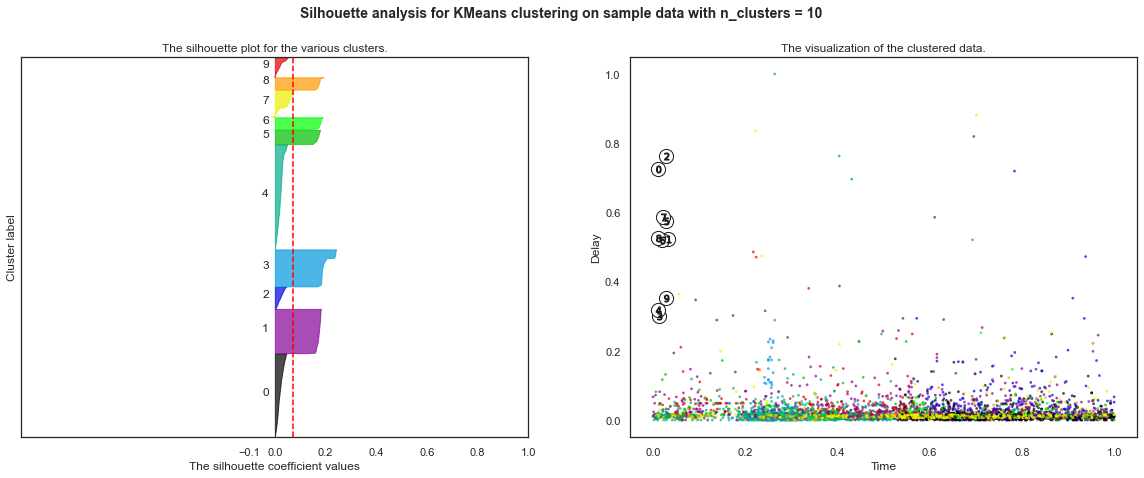

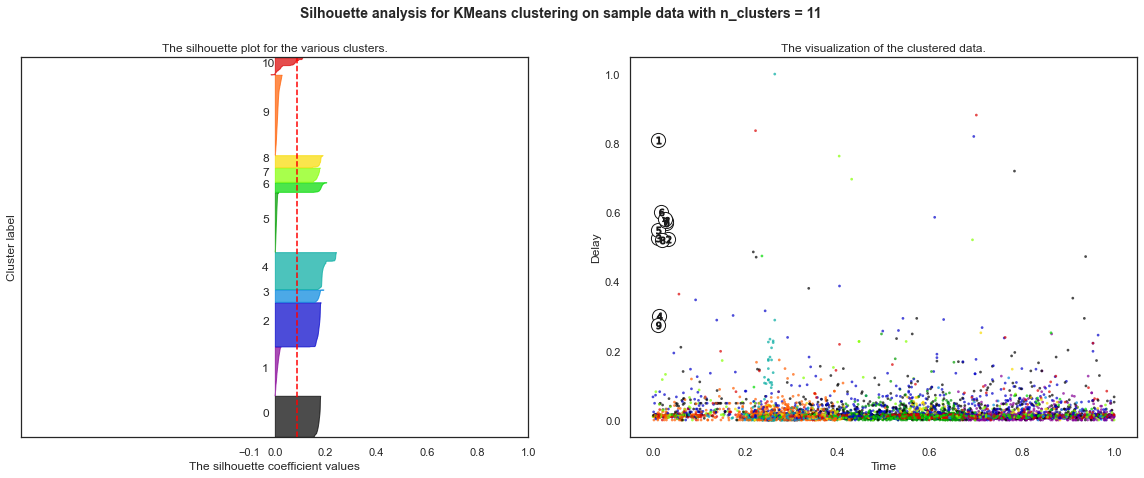

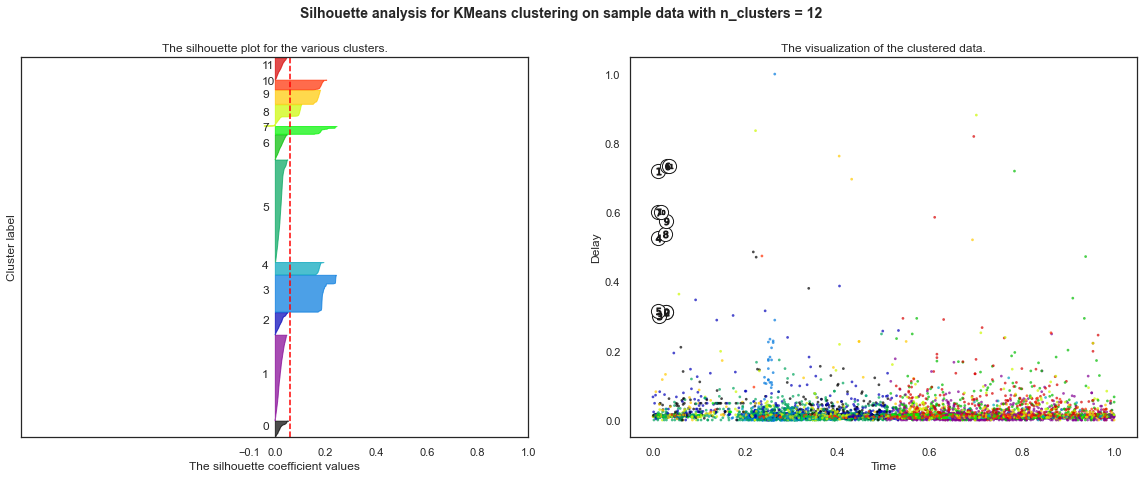

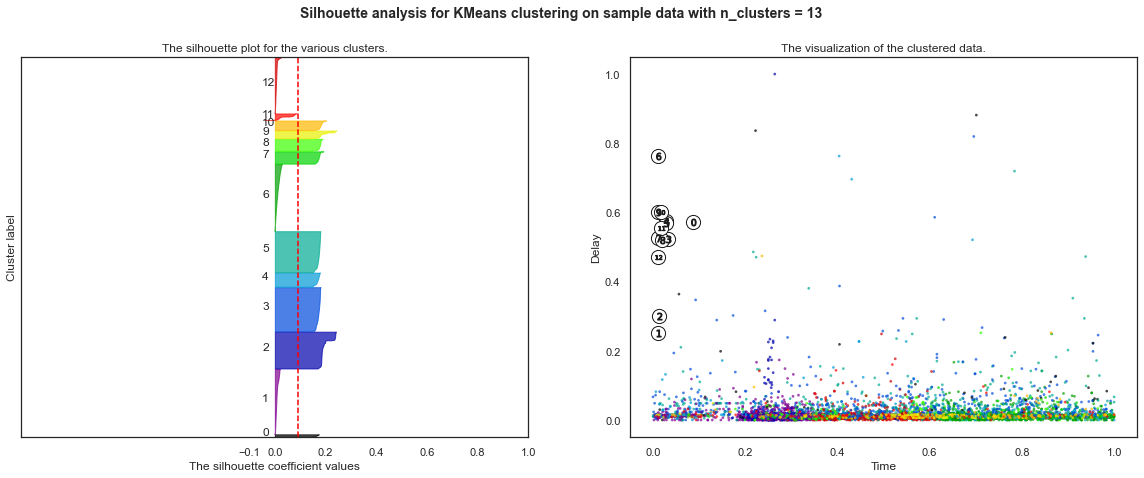

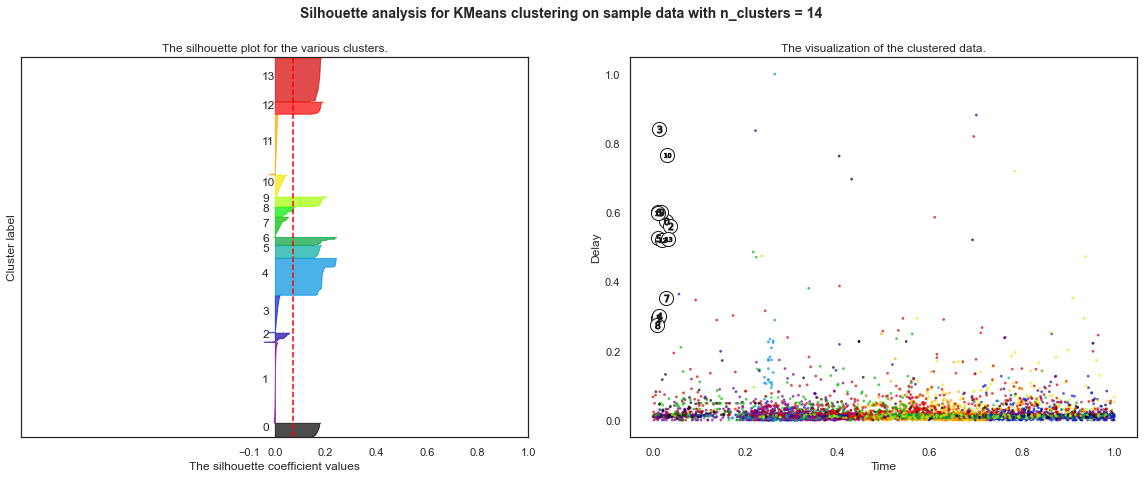

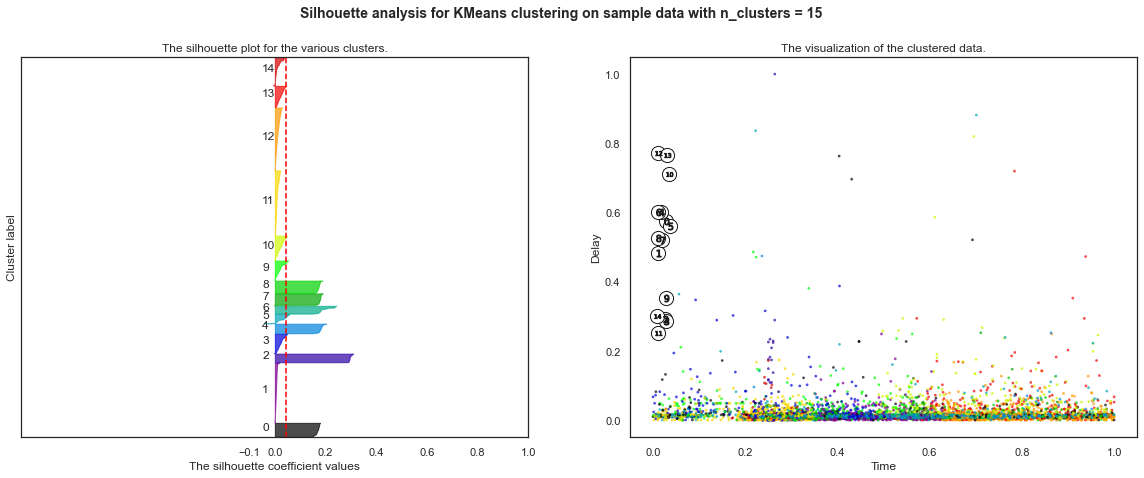

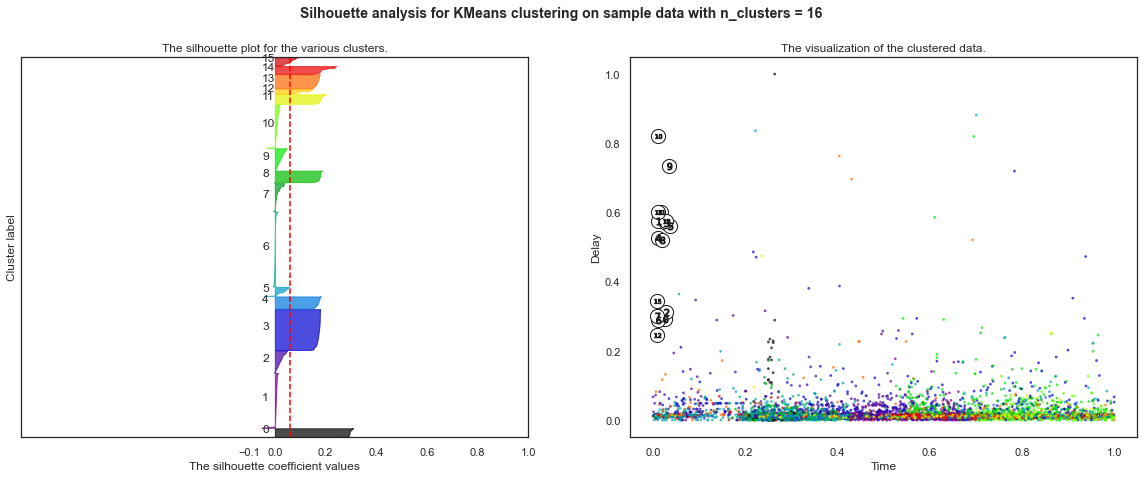

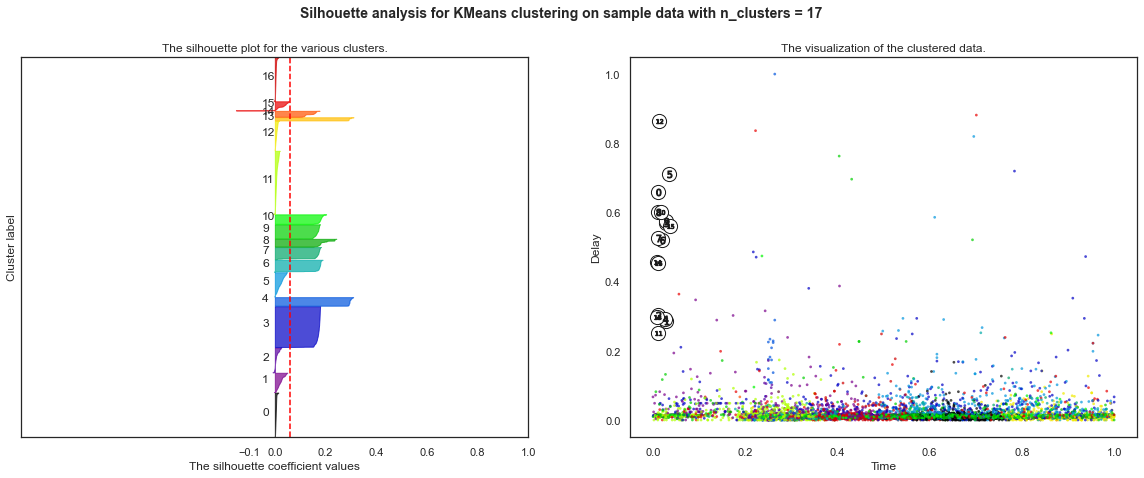

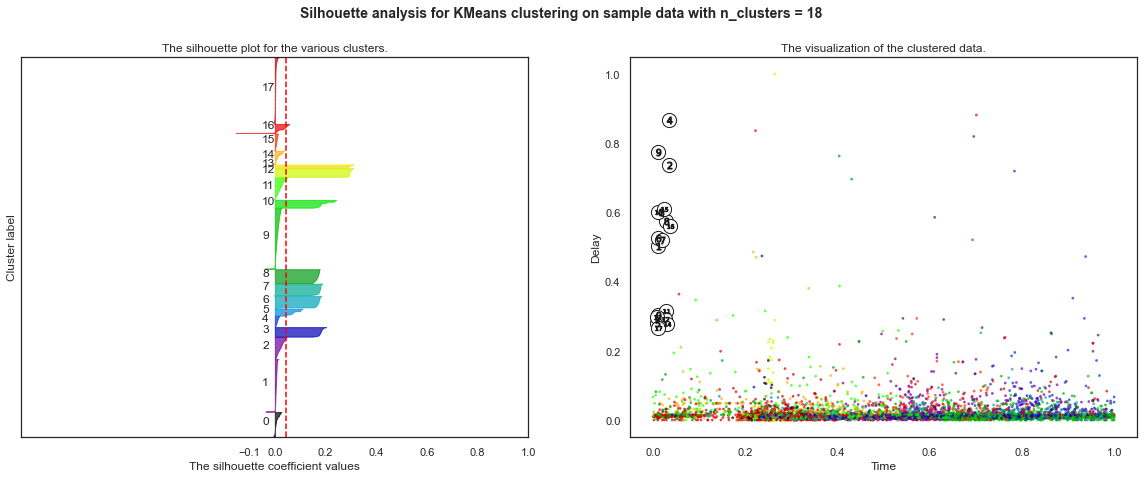

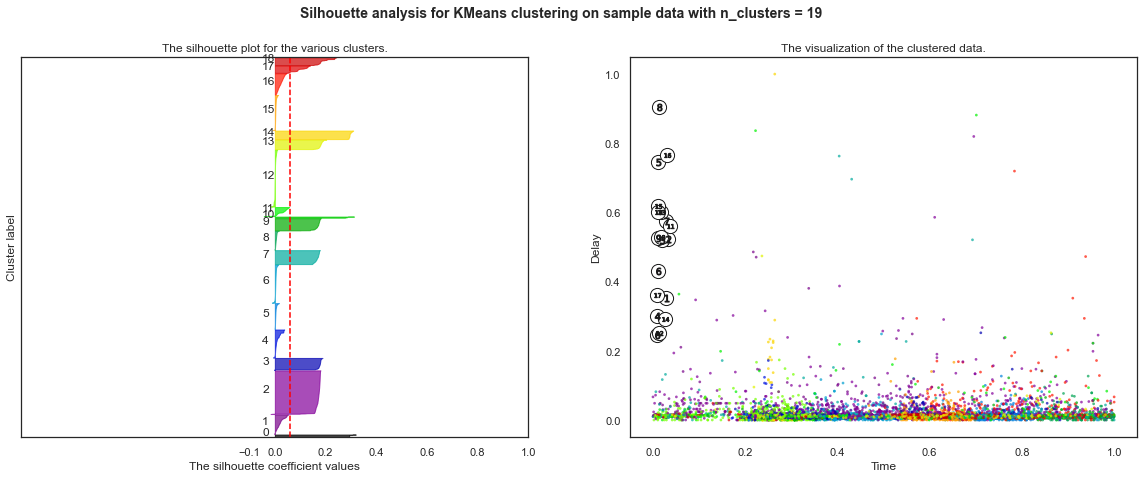

In [427]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

# referenced https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

X, y = IL_dummy['Time_in_hours'], IL_dummy['Min_Delay']

for k in range(5,20):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(20, 7)
    
    ax1.set_xlim([-1, 1])
    ax1.set_ylim([0, len(X) + (k + 1) * 10])
    
    clusterer = KMeans(n_clusters=k)
    clusterer.fit(IL_dummy)
    cluster_labels = clusterer.predict(IL_dummy)
    
    silhouette_avg = silhouette_score(IL_dummy, cluster_labels)
    print(
        "For k =",
        k,
        "The average silhouette_score is :",
        silhouette_avg,
    )
    
    sample_silhouette_values = silhouette_samples(IL_dummy, cluster_labels)
    
    y_lower = 10
    for i in range(k):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / k)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    
    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / k)
    ax2.scatter(
        IL_dummy['Time_in_hours'],IL_dummy['Min_Delay'], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Time")
    ax2.set_ylabel("Delay")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % k,
        fontsize=14,
        fontweight="bold",
    )

plt.show()